## COMPARISION CHARTS

In [1]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [2]:
import pandas as pd

# File paths
file_paths = [
    "/content/drive/MyDrive/GIT AblationStratergy/fft_ablationStudy/results/ffttrain_target_modules_ablation_results.csv",
    "/content/drive/MyDrive/GIT AblationStratergy/fft_test_ablationStudy/results/fftTest_target_modules_ablation_results.csv",
    "/content/drive/MyDrive/GIT AblationStratergy/ablationStudy/results/LoRA/lora_target_modules_ablation_results_optimized.csv"
]

# Load all CSV files
dfs = {path.split("/")[-1]: pd.read_csv(path) for path in file_paths}

# Display first few rows of each file to understand structure
dfs_preview = {name: df.head() for name, df in dfs.items()}
dfs_preview

{'ffttrain_target_modules_ablation_results.csv':   experiment                                       train_losses  \
 0        fft  [11.020973205566406, 11.088132858276367, 10.96...   
 
                                           val_losses  \
 0  [11.064232063293456, 11.08807144165039, 11.098...   
 
                                      memory_usage_MB  training_time_seconds  \
 0  [4076.23779296875, 4076.23779296875, 4752.1621...            8509.155756   
 
    best_val_loss                                       best_weights  
 0      11.029737  OrderedDict([('git.embeddings.word_embeddings....  ,
 'fftTest_target_modules_ablation_results.csv':    experiment  test_loss                                         bleu_score
 0  fftTesting  11.193929  {'bleu': 0.024314319549676687, 'precisions': [...,
 'lora_target_modules_ablation_results_optimized.csv':          experiment                              train_losses  \
 0  lora_vision_only  [9.1095, 8.7356, 8.6907, 8.6234, 8.5891]   
 1   

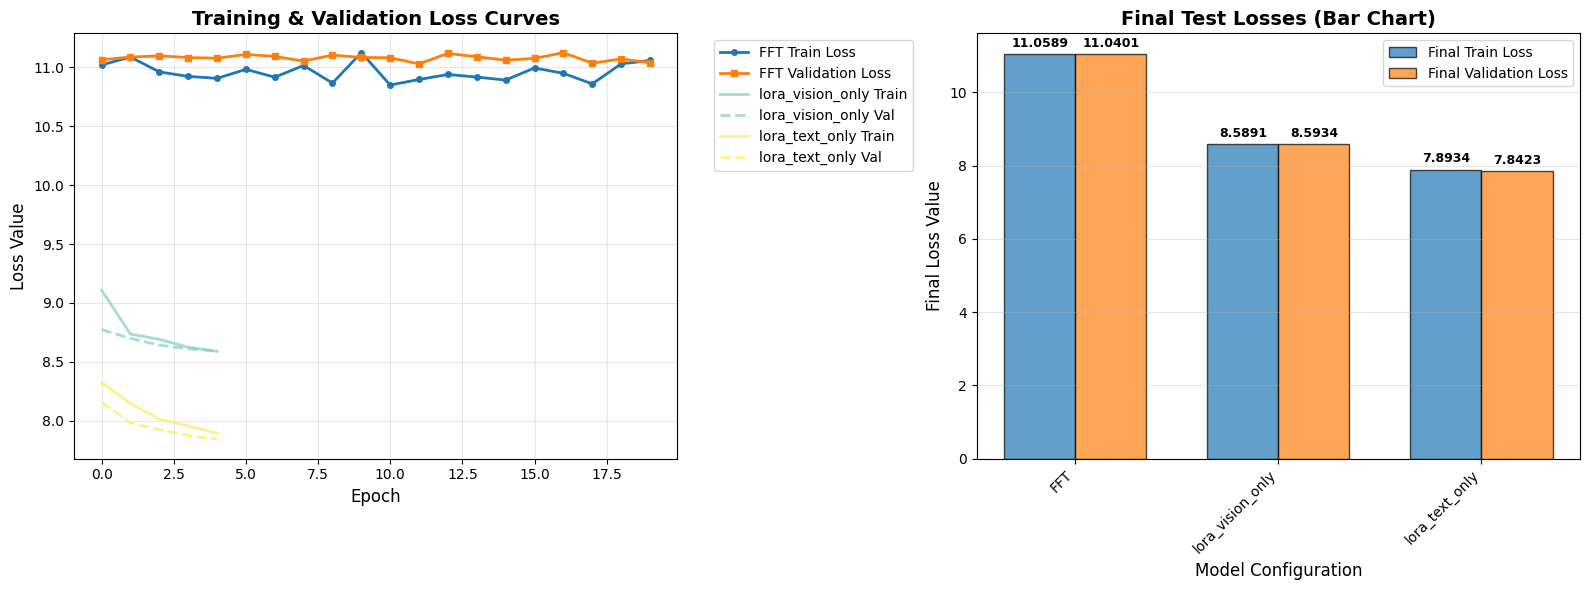

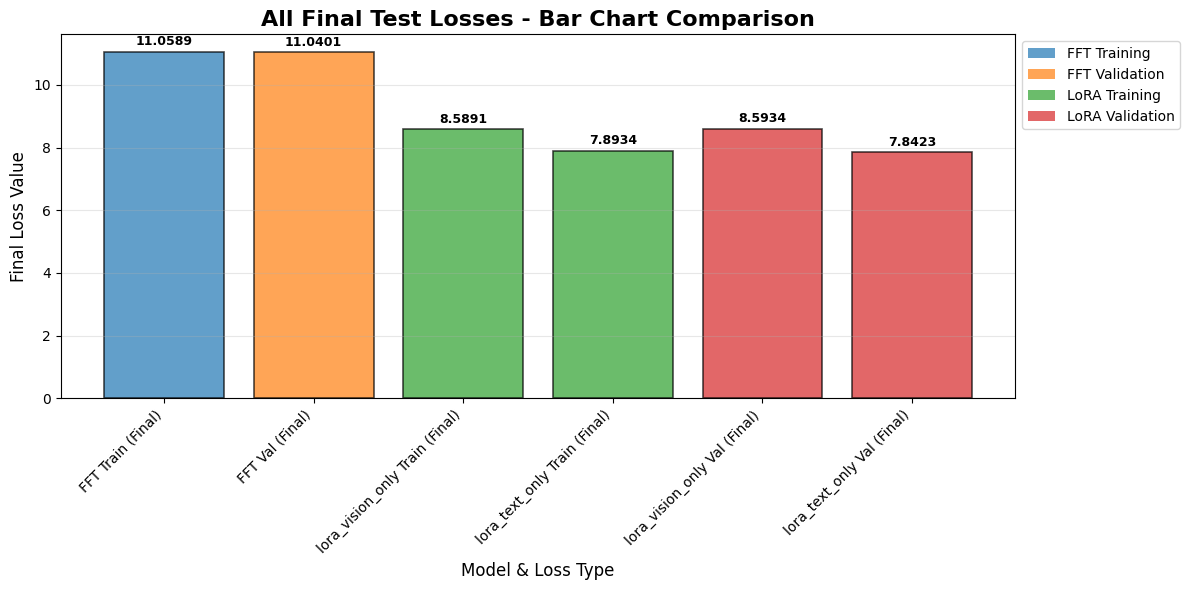


=== Loss Summary Statistics ===
FFT Training Loss (Final): 11.0589
FFT Validation Loss (Final): 11.0401
Average LoRA Training Loss (Final): 8.2413
Average LoRA Validation Loss (Final): 8.2179
Best LoRA Training Loss: 7.8934 (lora_text_only)
Best LoRA Validation Loss: 7.8423 (lora_text_only)
Worst LoRA Training Loss: 8.5891 (lora_vision_only)
Worst LoRA Validation Loss: 8.5934 (lora_vision_only)


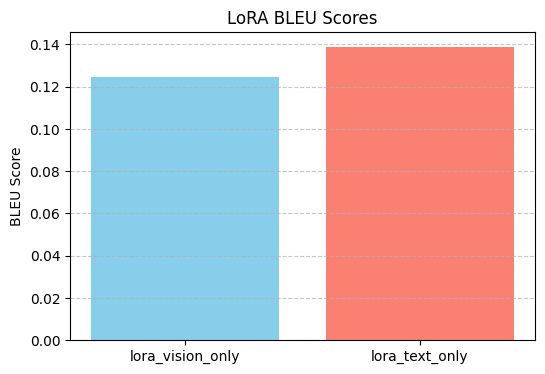

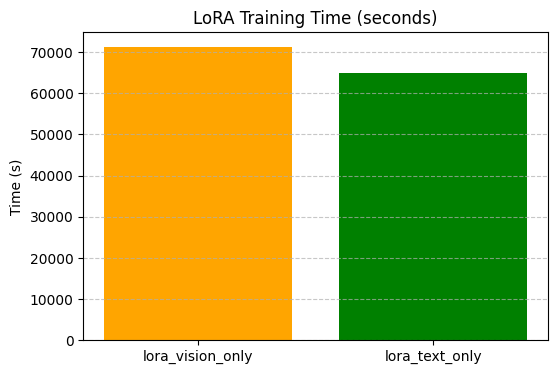

In [5]:
import ast
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Function to safely convert string lists to Python lists
def parse_list_column(df, col):
    return df[col].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else x)

# Parse the list-like columns
dfs["ffttrain_target_modules_ablation_results.csv"]["train_losses"] = parse_list_column(
    dfs["ffttrain_target_modules_ablation_results.csv"], "train_losses"
)
dfs["ffttrain_target_modules_ablation_results.csv"]["val_losses"] = parse_list_column(
    dfs["ffttrain_target_modules_ablation_results.csv"], "val_losses"
)
dfs["lora_target_modules_ablation_results_optimized.csv"]["train_losses"] = parse_list_column(
    dfs["lora_target_modules_ablation_results_optimized.csv"], "train_losses"
)
dfs["lora_target_modules_ablation_results_optimized.csv"]["val_losses"] = parse_list_column(
    dfs["lora_target_modules_ablation_results_optimized.csv"], "val_losses"
)

# Create a figure with subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# LEFT PLOT: Line graphs for training and validation losses over epochs
fft_train_df = dfs["ffttrain_target_modules_ablation_results.csv"]
lora_df = dfs["lora_target_modules_ablation_results_optimized.csv"]

# Plot FFT training and validation curves
ax1.plot(fft_train_df["train_losses"].iloc[0], label="FFT Train Loss",
         linewidth=2, color='#1f77b4', marker='o', markersize=4)
ax1.plot(fft_train_df["val_losses"].iloc[0], label="FFT Validation Loss",
         linewidth=2, color='#ff7f0e', marker='s', markersize=4)

# Plot LoRA training and validation curves
colors = plt.cm.Set3(np.linspace(0, 1, len(lora_df)))
for idx, (row_idx, row) in enumerate(lora_df.iterrows()):
    ax1.plot(row["train_losses"], label=f"{row['experiment']} Train",
             linewidth=2, color=colors[idx], linestyle='-', alpha=0.8)
    ax1.plot(row["val_losses"], label=f"{row['experiment']} Val",
             linewidth=2, color=colors[idx], linestyle='--', alpha=0.8)

ax1.set_title("Training & Validation Loss Curves", fontsize=14, fontweight='bold')
ax1.set_xlabel("Epoch", fontsize=12)
ax1.set_ylabel("Loss Value", fontsize=12)
ax1.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
ax1.grid(True, alpha=0.3)

# RIGHT PLOT: Bar chart for test/final losses
# Get FFT final losses
fft_train_loss = fft_train_df["train_losses"].iloc[0][-1]
fft_val_loss = fft_train_df["val_losses"].iloc[0][-1]

# Get LoRA final losses
lora_experiments = []
lora_final_train = []
lora_final_val = []

for idx, row in lora_df.iterrows():
    lora_experiments.append(row['experiment'])
    lora_final_train.append(row['train_losses'][-1])
    lora_final_val.append(row['val_losses'][-1])

# Create bar chart data
categories = ['FFT'] + lora_experiments
train_final_losses = [fft_train_loss] + lora_final_train
val_final_losses = [fft_val_loss] + lora_final_val

x = np.arange(len(categories))
width = 0.35

# Create grouped bar chart
bars1 = ax2.bar(x - width/2, train_final_losses, width, label='Final Train Loss',
                color='#1f77b4', alpha=0.7, edgecolor='black', linewidth=1)
bars2 = ax2.bar(x + width/2, val_final_losses, width, label='Final Validation Loss',
                color='#ff7f0e', alpha=0.7, edgecolor='black', linewidth=1)

ax2.set_title("Final Test Losses (Bar Chart)", fontsize=14, fontweight='bold')
ax2.set_xlabel("Model Configuration", fontsize=12)
ax2.set_ylabel("Final Loss Value", fontsize=12)
ax2.set_xticks(x)
ax2.set_xticklabels(categories, rotation=45, ha='right')
ax2.legend()
ax2.grid(True, alpha=0.3, axis='y')

# Add value labels on bars
for bars, values in [(bars1, train_final_losses), (bars2, val_final_losses)]:
    for bar, value in zip(bars, values):
        height = bar.get_height()
        ax2.text(bar.get_x() + bar.get_width()/2., height + max(train_final_losses + val_final_losses) * 0.01,
                f'{value:.4f}', ha='center', va='bottom', fontweight='bold', fontsize=9)

plt.tight_layout()
plt.show()

# Additional standalone bar chart for test losses only (as requested)
plt.figure(figsize=(12, 6))

# All test/final losses in one bar chart
all_categories = ['FFT Train (Final)', 'FFT Val (Final)'] + [f'{exp} Train (Final)' for exp in lora_experiments] + [f'{exp} Val (Final)' for exp in lora_experiments]
all_values = [fft_train_loss, fft_val_loss] + lora_final_train + lora_final_val

# Create color scheme
n_fft = 2
n_lora_train = len(lora_experiments)
n_lora_val = len(lora_experiments)

colors = ['#1f77b4', '#ff7f0e'] + ['#2ca02c'] * n_lora_train + ['#d62728'] * n_lora_val

bars = plt.bar(all_categories, all_values, color=colors, alpha=0.7, edgecolor='black', linewidth=1.2)

plt.title("All Final Test Losses - Bar Chart Comparison", fontsize=16, fontweight='bold')
plt.ylabel("Final Loss Value", fontsize=12)
plt.xlabel("Model & Loss Type", fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(True, alpha=0.3, axis='y')

# Add value labels
for bar, value in zip(bars, all_values):
    plt.text(bar.get_x() + bar.get_width()/2, value + max(all_values) * 0.01,
             f'{value:.4f}', ha='center', va='bottom', fontweight='bold', fontsize=9)

# Create custom legend
legend_elements = [
    plt.Rectangle((0, 0), 1, 1, facecolor='#1f77b4', alpha=0.7, label='FFT Training'),
    plt.Rectangle((0, 0), 1, 1, facecolor='#ff7f0e', alpha=0.7, label='FFT Validation'),
    plt.Rectangle((0, 0), 1, 1, facecolor='#2ca02c', alpha=0.7, label='LoRA Training'),
    plt.Rectangle((0, 0), 1, 1, facecolor='#d62728', alpha=0.7, label='LoRA Validation')
]
plt.legend(handles=legend_elements, loc='upper left', bbox_to_anchor=(1, 1))

plt.tight_layout()
plt.show()

# Summary statistics
print("\n=== Loss Summary Statistics ===")
print(f"FFT Training Loss (Final): {fft_train_loss:.4f}")
print(f"FFT Validation Loss (Final): {fft_val_loss:.4f}")
print(f"Average LoRA Training Loss (Final): {np.mean(lora_final_train):.4f}")
print(f"Average LoRA Validation Loss (Final): {np.mean(lora_final_val):.4f}")
print(f"Best LoRA Training Loss: {min(lora_final_train):.4f} ({lora_experiments[np.argmin(lora_final_train)]})")
print(f"Best LoRA Validation Loss: {min(lora_final_val):.4f} ({lora_experiments[np.argmin(lora_final_val)]})")
print(f"Worst LoRA Training Loss: {max(lora_final_train):.4f} ({lora_experiments[np.argmax(lora_final_train)]})")
print(f"Worst LoRA Validation Loss: {max(lora_final_val):.4f} ({lora_experiments[np.argmax(lora_final_val)]})")

# Bar chart: LoRA BLEU scores
plt.figure(figsize=(6,4))
plt.bar(lora_df["experiment"], lora_df["bleu_score"], color=["skyblue", "salmon"])
plt.title("LoRA BLEU Scores")
plt.ylabel("BLEU Score")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

# Bar chart: LoRA Training Time
plt.figure(figsize=(6,4))
plt.bar(lora_df["experiment"], lora_df["training_time_seconds"], color=["orange", "green"])
plt.title("LoRA Training Time (seconds)")
plt.ylabel("Time (s)")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()


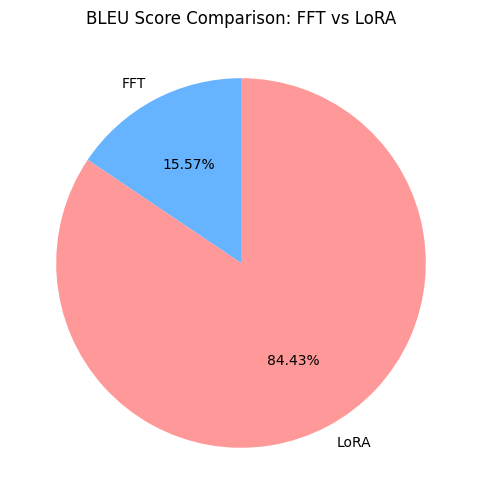

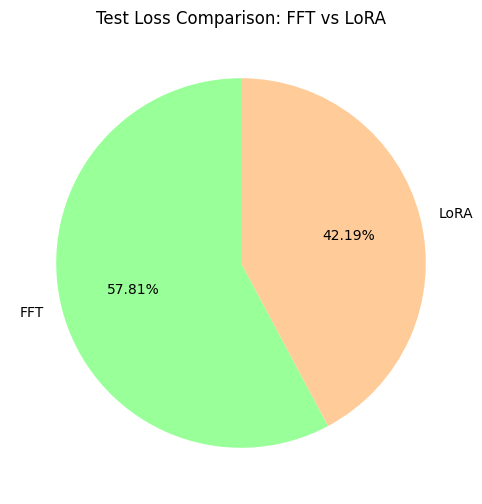

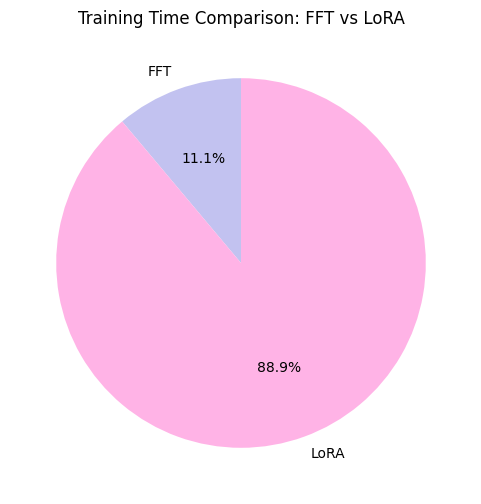

In [ ]:
# Prepare comparison data between FFT and LoRA

# FFT metrics
fft_train_df = dfs["ffttrain_target_modules_ablation_results.csv"]
fft_test_df = dfs["fftTest_target_modules_ablation_results.csv"]
fft_bleu = ast.literal_eval(fft_test_df["bleu_score"].iloc[0])["bleu"]
fft_loss = fft_test_df["test_loss"].iloc[0]
fft_time = fft_train_df["training_time_seconds"].iloc[0]

# LoRA metrics - take mean for fair comparison if multiple experiments
lora_df = dfs["lora_target_modules_ablation_results_optimized.csv"]
lora_bleu = lora_df["bleu_score"].mean()
lora_loss = lora_df["test_loss"].mean()
lora_time = lora_df["training_time_seconds"].mean()

# Pie chart for BLEU score comparison
plt.figure(figsize=(6,6))
plt.pie([fft_bleu, lora_bleu], labels=["FFT", "LoRA"], autopct='%1.2f%%', startangle=90, colors=["#66b3ff", "#ff9999"])
plt.title("BLEU Score Comparison: FFT vs LoRA")
plt.show()

# Pie chart for Test Loss (lower is better, but we show as proportion)
plt.figure(figsize=(6,6))
plt.pie([fft_loss, lora_loss], labels=["FFT", "LoRA"], autopct='%1.2f%%', startangle=90, colors=["#99ff99", "#ffcc99"])
plt.title("Test Loss Comparison: FFT vs LoRA")
plt.show()

# Pie chart for Training Time
plt.figure(figsize=(6,6))
plt.pie([fft_time, lora_time], labels=["FFT", "LoRA"], autopct='%1.1f%%', startangle=90, colors=["#c2c2f0", "#ffb3e6"])
plt.title("Training Time Comparison: FFT vs LoRA")
plt.show()
